<a href="https://colab.research.google.com/github/Prakartt/Customer-Segmentation-and-Stock-market-prediction-for-portfolio-generation-/blob/main/CNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN-LSTM

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline
plt.style.use("ggplot")

In [ ]:
dataset = pd.read_csv('GOOG.csv')
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
...,...,...,...,...,...,...,...
4001,2020-07-13,1550.000000,1577.131958,1505.243042,1511.339966,1511.339966,1846400
4002,2020-07-14,1490.310059,1522.949951,1483.500000,1520.579956,1520.579956,1585000
4003,2020-07-15,1523.130005,1535.329956,1498.000000,1513.640015,1513.640015,1610700
4004,2020-07-16,1500.000000,1518.689941,1486.310059,1518.000000,1518.000000,1519300


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4006 entries, 0 to 4005
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4006 non-null   object 
 1   Open       4006 non-null   float64
 2   High       4006 non-null   float64
 3   Low        4006 non-null   float64
 4   Close      4006 non-null   float64
 5   Adj Close  4006 non-null   float64
 6   Volume     4006 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 219.2+ KB


In [ ]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4006.000000,4006.000000,4006.000000,4006.000000,4006.000000,4.006000e+03
mean,519.588636,524.473898,514.551292,519.669776,519.669776,6.916466e+06
std,369.380297,372.830122,366.249678,369.794911,369.794911,7.994278e+06
min,49.409801,50.680038,47.800831,49.818268,49.818268,7.900000e+03
25%,239.472400,241.624336,236.975514,239.440025,239.440025,1.718900e+06
50%,336.583405,339.118897,333.425232,337.315659,337.315659,4.216250e+06
75%,758.877487,767.349991,752.089997,759.529984,759.529984,8.821450e+06
max,1550.000000,1577.131958,1521.400024,1541.739990,1541.739990,8.254150e+07


In [ ]:
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
dataset.reset_index(drop=True, inplace=True)
dataset.fillna(dataset.mean(), inplace=True)
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


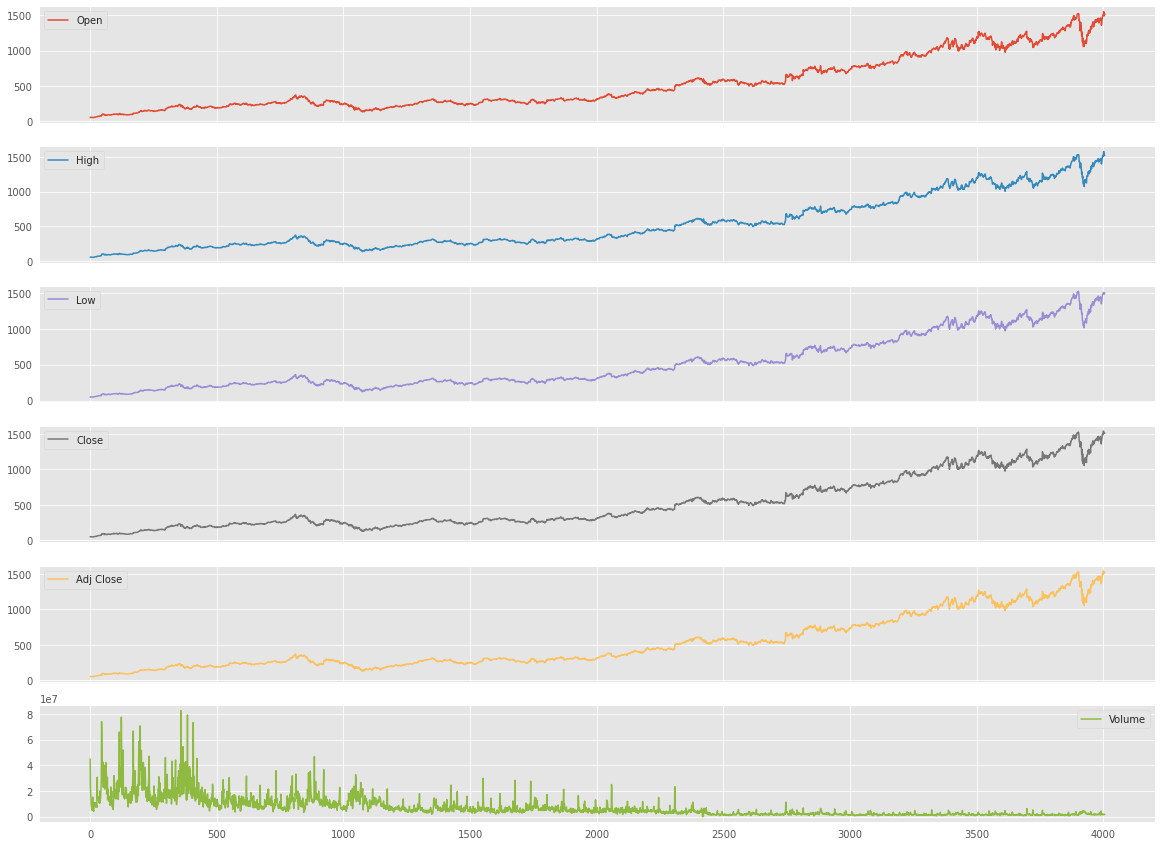

In [ ]:
dataset.plot(legend=True,subplots=True, figsize = (20, 15))
plt.show()

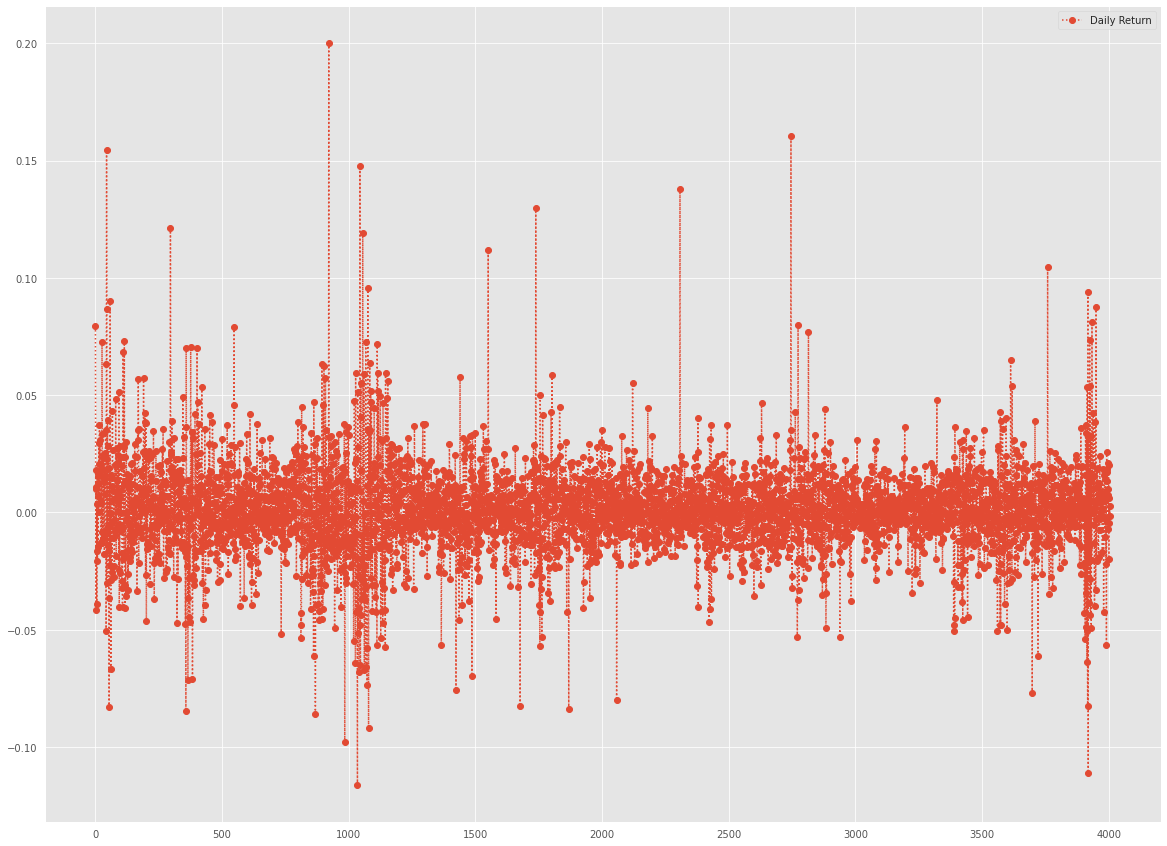

In [ ]:
m_avg_day = [10, 50 ,100]
for i in m_avg_day:
    column_name = 'M_avg for %s days' %(str(i))
    dataset[column_name] = pd.DataFrame.rolling(dataset['Close'],i).mean()

dataset['Daily Return'] = dataset['Close'].pct_change()

dataset['Daily Return'].plot(figsize=(20,15),legend=True,linestyle=':',marker='o')
plt.show()

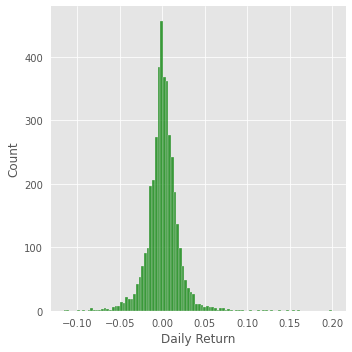

In [ ]:
sns.displot(dataset['Daily Return'].dropna(),bins=100,color='green')
plt.show()

In [ ]:
date=pd.DataFrame(dataset['Date'])
closing_df1 = pd.DataFrame(dataset['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

,Date,data_close
0,2004-08-19,49.982655
1,2004-08-20,53.952770
2,2004-08-23,54.495735
3,2004-08-24,52.239193
4,2004-08-25,52.802086


In [ ]:
dataset.reset_index(drop=True, inplace=True)
dataset.fillna(dataset.mean(), inplace=True)
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,M_avg for 10 days,M_avg for 50 days,M_avg for 100 days,Daily Return
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300,519.073502,516.726428,514.343382,0.001037
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800,519.073502,516.726428,514.343382,0.079430
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800,519.073502,516.726428,514.343382,0.010064
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700,519.073502,516.726428,514.343382,-0.041408
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100,519.073502,516.726428,514.343382,0.010775


In [ ]:
dataset.nunique()

Date                  4006
Open                  3881
High                  3871
Low                   3904
Close                 3930
Adj Close             3930
Volume                3909
M_avg for 10 days     3997
M_avg for 50 days     3956
M_avg for 100 days    3907
Daily Return          4006
dtype: int64

In [ ]:
dataset.sort_index(axis=1,ascending=True)

,Adj Close,Close,Daily Return,Date,High,Low,M_avg for 10 days,M_avg for 100 days,M_avg for 50 days,Open,Volume
0,49.982655,49.982655,0.001037,2004-08-19,51.835709,47.800831,519.073502,514.343382,516.726428,49.813286,44871300
1,53.952770,53.952770,0.079430,2004-08-20,54.336334,50.062355,519.073502,514.343382,516.726428,50.316402,22942800
2,54.495735,54.495735,0.010064,2004-08-23,56.528118,54.321388,519.073502,514.343382,516.726428,55.168217,18342800
3,52.239193,52.239193,-0.041408,2004-08-24,55.591629,51.591621,519.073502,514.343382,516.726428,55.412300,15319700
4,52.802086,52.802086,0.010775,2004-08-25,53.798351,51.746044,519.073502,514.343382,516.726428,52.284027,9232100
...,...,...,...,...,...,...,...,...,...,...,...
4001,1511.339966,1511.339966,-0.019718,2020-07-13,1577.131958,1505.243042,1475.226990,1329.745349,1420.980295,1550.000000,1846400
4002,1520.579956,1520.579956,0.006114,2020-07-14,1522.949951,1483.500000,1487.787988,1329.769648,1424.979695,1490.310059,1585000
4003,1513.640015,1513.640015,-0.004564,2020-07-15,1535.329956,1498.000000,1497.790991,1330.054949,1428.716494,1523.130005,1610700
4004,1518.000000,1518.000000,0.002880,2020-07-16,1518.689941,1486.310059,1505.786987,1331.019049,1432.054294,1500.000000,1519300


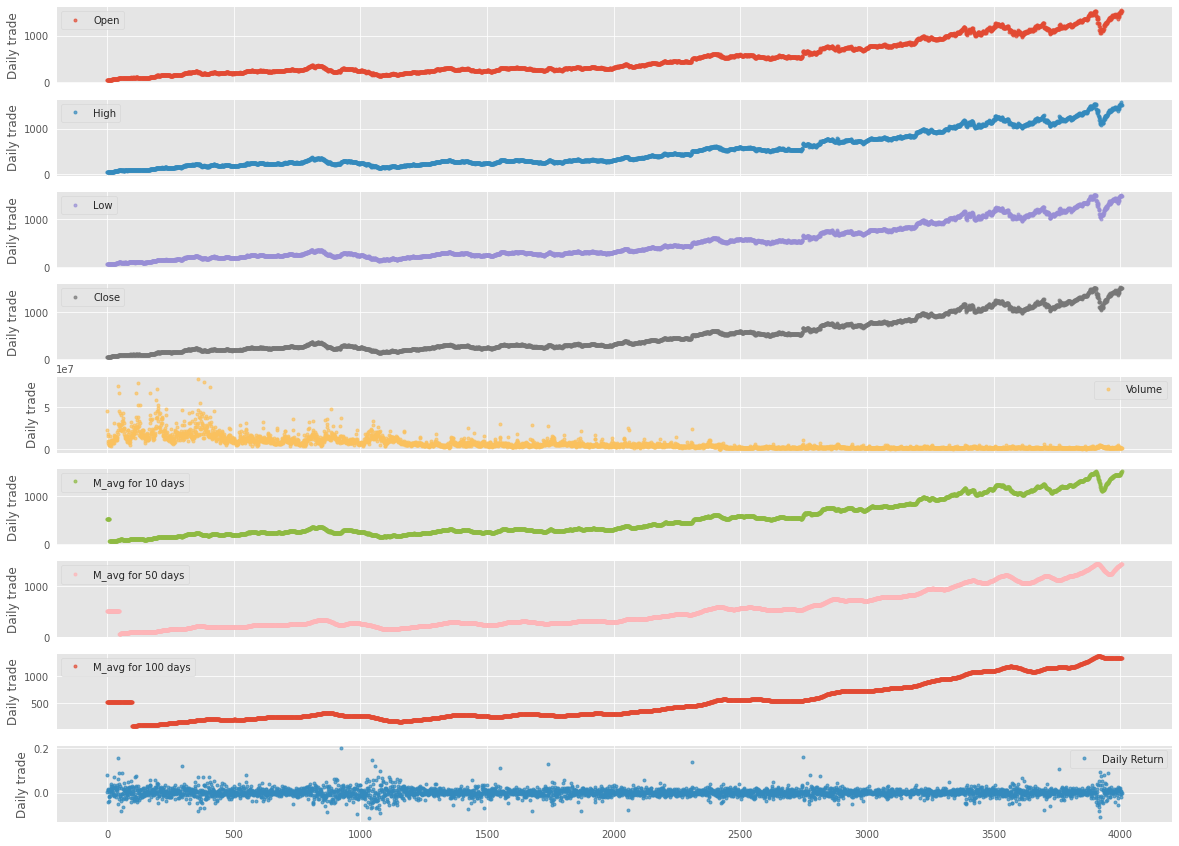

In [ ]:
cols_plot = ['Open', 'High', 'Low','Close','Volume','M_avg for 10 days','M_avg for 50 days','M_avg for 100 days','Daily Return']
axes = dataset[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(20, 15), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

Text(0, 0.5, 'Closing price')

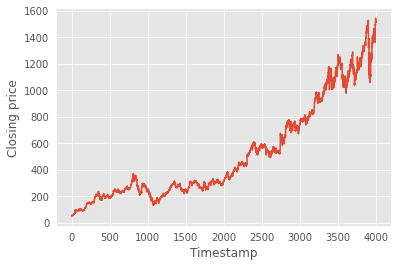

In [ ]:
plt.plot(dataset['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")

In [ ]:
df = dataset
print(df)

            Date         Open         High          Low        Close  \
0     2004-08-19    49.813286    51.835709    47.800831    49.982655   
1     2004-08-20    50.316402    54.336334    50.062355    53.952770   
2     2004-08-23    55.168217    56.528118    54.321388    54.495735   
3     2004-08-24    55.412300    55.591629    51.591621    52.239193   
4     2004-08-25    52.284027    53.798351    51.746044    52.802086   
...          ...          ...          ...          ...          ...   
4001  2020-07-13  1550.000000  1577.131958  1505.243042  1511.339966   
4002  2020-07-14  1490.310059  1522.949951  1483.500000  1520.579956   
4003  2020-07-15  1523.130005  1535.329956  1498.000000  1513.640015   
4004  2020-07-16  1500.000000  1518.689941  1486.310059  1518.000000   
4005  2020-07-17  1521.619995  1523.439941  1498.420044  1515.550049   

        Adj Close    Volume  M_avg for 10 days  M_avg for 50 days  \
0       49.982655  44871300         519.073502         516.726428 

In [ ]:
dataset.isnull().sum()

Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
M_avg for 10 days     0
M_avg for 50 days     0
M_avg for 100 days    0
Daily Return          0
dtype: int64

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,4006.0,5.195886e+02,3.693803e+02,49.409801,2.394724e+02,3.365834e+02,7.588775e+02,1.550000e+03
High,4006.0,5.244739e+02,3.728301e+02,50.680038,2.416243e+02,3.391189e+02,7.673500e+02,1.577132e+03
Low,4006.0,5.145513e+02,3.662497e+02,47.800831,2.369755e+02,3.334252e+02,7.520900e+02,1.521400e+03
Close,4006.0,5.196698e+02,3.697949e+02,49.818268,2.394400e+02,3.373157e+02,7.595300e+02,1.541740e+03
Adj Close,4006.0,5.196698e+02,3.697949e+02,49.818268,2.394400e+02,3.373157e+02,7.595300e+02,1.541740e+03
Volume,4006.0,6.916466e+06,7.994278e+06,7900.000000,1.718900e+06,4.216250e+06,8.821450e+06,8.254150e+07
M_avg for 10 days,4006.0,5.190735e+02,3.677165e+02,50.999839,2.403368e+02,3.385186e+02,7.554013e+02,1.510872e+03
M_avg for 50 days,4006.0,5.167264e+02,3.594517e+02,63.286188,2.405905e+02,3.425671e+02,7.384151e+02,1.435419e+03
M_avg for 100 days,4006.0,5.143434e+02,3.511020e+02,76.899262,2.495649e+02,3.457554e+02,7.288320e+02,1.365525e+03
Daily Return,4006.0,1.036582e-03,1.928700e-02,-0.116091,-7.348273e-03,6.729545e-04,9.895063e-03,1.999154e-01


In [ ]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))


3123
781


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

In [ ]:
cnn_lstm_model = tf.keras.models.Sequential([
    
    tf.keras.layers.TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))),
    tf.keras.layers.TimeDistributed(MaxPooling1D(2)),
    tf.keras.layers.TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')),
    tf.keras.layers.TimeDistributed(MaxPooling1D(2)),
    tf.keras.layers.TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')),
    tf.keras.layers.TimeDistributed(MaxPooling1D(2)),
    tf.keras.layers.TimeDistributed(Flatten()),
    
    tf.keras.layers.Bidirectional(LSTM(100, return_sequences=True)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(LSTM(100, return_sequences=False)),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(1, activation='linear')

])

In [ ]:
cnn_lstm_model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = cnn_lstm_model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
79/79 [==============================] - 6s 21ms/step - loss: 0.0116 - mse: 0.0116 - mae: 0.0770 - val_loss: 0.0060 - val_mse: 0.0060 - val_mae: 0.0594
Epoch 2/40
79/79 [==============================] - 1s 12ms/step - loss: 0.0057 - mse: 0.0057 - mae: 0.0562 - val_loss: 0.0047 - val_mse: 0.0047 - val_mae: 0.0523
Epoch 3/40
79/79 [==============================] - 1s 12ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0482 - val_loss: 0.0062 - val_mse: 0.0062 - val_mae: 0.0617
Epoch 4/40
79/79 [==============================] - 1s 12ms/step - loss: 0.0062 - mse: 0.0062 - mae: 0.0564 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0423
Epoch 5/40
79/79 [==============================] - 1s 12ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0476 - val_loss: 0.0045 - val_mse: 0.0045 - val_mae: 0.0535
Epoch 6/40
79/79 [==============================] - 1s 12ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0477 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0442
Epoch 7/40
79/79 [====

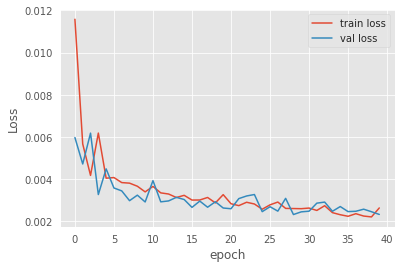

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

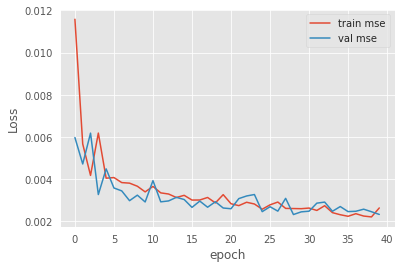

In [ ]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()


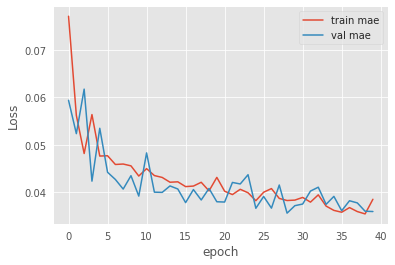

In [ ]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [ ]:
from tensorflow.keras.utils import plot_model
print(cnn_lstm_model.summary())
# plot_model(cnn_lstm_model, to_file='CNN_LSTM_Model.png', show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, 1, 98, 64)         256       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 49, 64)         0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 1, 47, 128)        24704     
_________________________________________________________________
time_distributed_3 (TimeDist (None, 1, 23, 128)        0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 1, 21, 128)        49280     
_________________________________________________________________
time_distributed_5 (TimeDist (None, 1, 10, 128)        0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 1, 1280)           0

In [ ]:
cnn_lstm_model.evaluate(test_X, test_Y)

25/25 [==============================] - 0s 3ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0360


[0.0023242428433150053, 0.0023242428433150053, 0.03595731407403946]

In [ ]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

y_pred_prob = cnn_lstm_model.predict(test_X, verbose=0)
y_pred_prob = y_pred_prob[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), y_pred_prob)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), y_pred_prob)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), y_pred_prob)
print('Max Error: %f' % var2)

Variance: 0.931354
R2 Score: 0.931354
Max Error: 0.239717


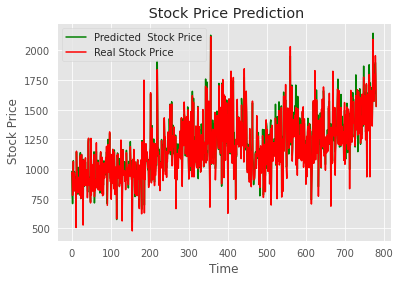

In [ ]:
predicted  = cnn_lstm_model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_train = len(train_X)
for j in range(len_train , len_train + len(test_X)):
    temp = dataset.iloc[j,3]
    test_label[j - len_train] = test_label[j - len_train] * temp + temp
    predicted[j - len_train] = predicted[j - len_train] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()